Outcome 드랍, BMI regression으로 예측

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import requests
from io import StringIO
from io import BytesIO
from sklearn.model_selection import cross_val_score

df = pd.read_csv('../week2/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
X = df.drop(['Outcome', 'BMI'], axis=1)
y = df['BMI']

In [26]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [27]:
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [28]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63
764,2,122,70,27,0,0.340,27
765,5,121,72,23,112,0.245,30
766,1,126,60,0,0,0.349,47


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 7) (154, 7) (614,) (154,)


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)
print('평균 제곱근 오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((actual - predicted) ** 2)
print('평균 제곱근 오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error
print('평균 제곱근 오차', mse(ly_preds, y_test))

평균 제곱근 오차 49.41151592580262
평균 제곱근 오차 49.41151592580262
평균 제곱근 오차 49.41151592580262


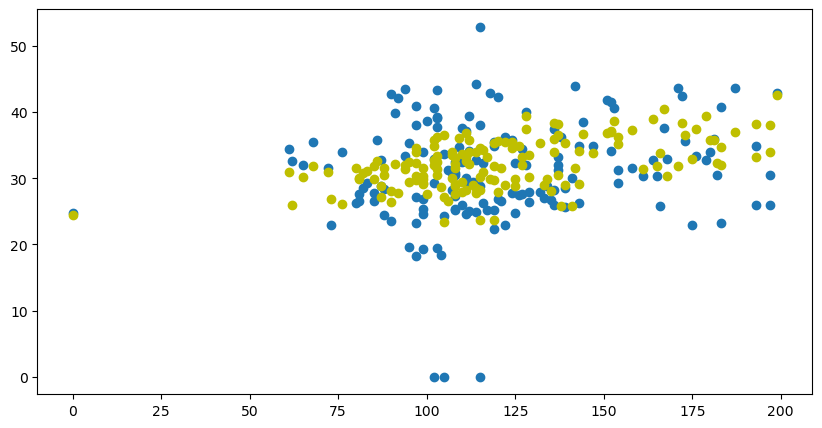

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Glucose'], y_test, label='y_test')
plt.scatter(X_test['Glucose'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [34]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균 제곱근 오차', mean_squared_error(dy_preds, y_test))

평균 제곱근 오차 97.84207792207792


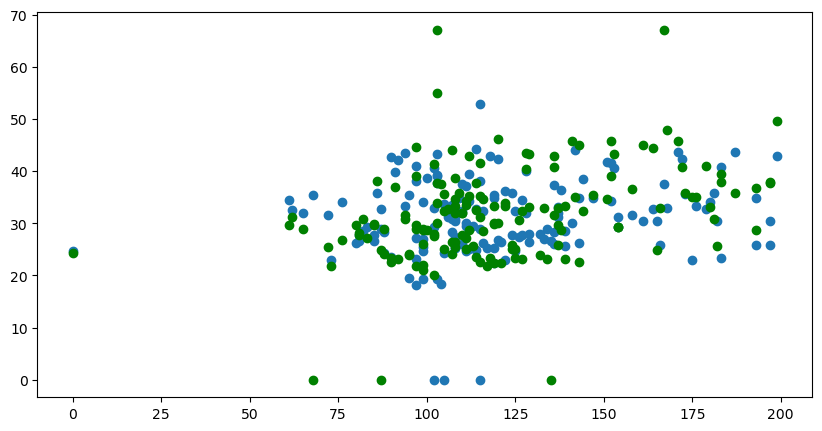

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Glucose'], y_test, label='y_test')
plt.scatter(X_test['Glucose'], dy_preds, c='g', label='dy_preds')
plt.show()         

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균 제곱근 오차', mean_squared_error(ry_preds, y_test))

평균 제곱근 오차 49.12819038961042


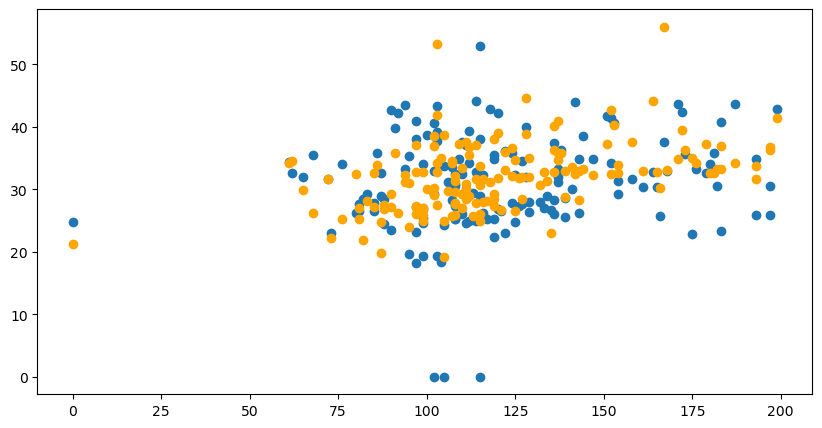

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Glucose'], y_test, label='y_test')
plt.scatter(X_test['Glucose'], ry_preds, c='orange', label='ry_preds')

plt.show()         

In [40]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균 제곱근 오차', mean_squared_error(ry_preds, y_test))

평균 제곱근 오차 48.07446399496537


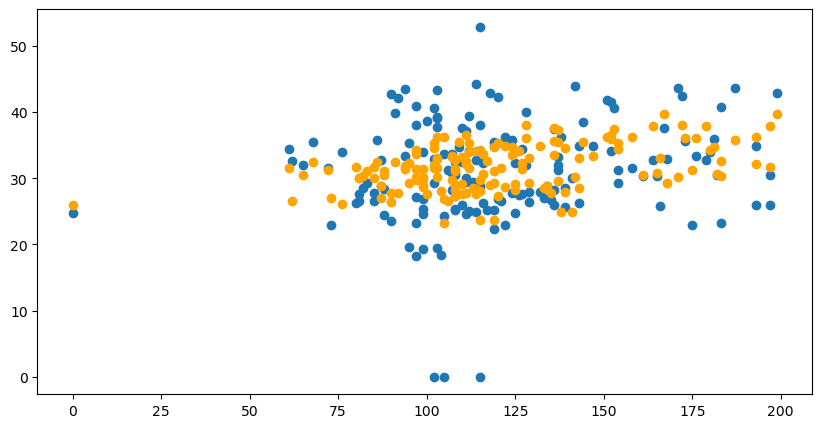

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Glucose'], y_test, label='y_test')
plt.scatter(X_test['Glucose'], ry_preds, c='orange', label='ry_preds')

plt.show()